In [2]:
import pandas as pd
import numpy as np
import math as m

# About the data

In [43]:
data = pd.read_csv('LeagueofLegends.csv')

In [44]:
data= data.filter(['Address','bResult','rResult',
                   'blueTopChamp','blueMiddleChamp','blueADCChamp','blueSupportChamp','blueJungleChamp',
                  'redTopChamp','redMiddleChamp','redADCChamp','redSupportChamp','redJungleChamp',
                  'goldblueMiddle','goldblueTop','goldblueADC','goldblueSupport','goldblueJungle',
                  'goldredMiddle','goldredTop','goldredADC','goldredSupport','goldredJungle'])

In [45]:
print(data.shape)

(7620, 23)


# Summing the gold for each champ

In [46]:
gold_list = ['goldblueMiddle','goldblueTop','goldblueADC','goldblueSupport','goldblueJungle',
             'goldredMiddle','goldredTop','goldredADC','goldredSupport','goldredJungle']

conv_to_list = lambda x : x.replace('[' ,'').replace(']','').split(',')
make_int = lambda x : int(x)

for gld in gold_list:
    data[gld] = data[gld].map(conv_to_list)
    #Grabs the gold from the first 15 minutes of the game.
    data[gld] = data[gld].map(lambda x : max(list(map(make_int , x))))

In [47]:
data.head(5)

,Address,bResult,rResult,blueTopChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueJungleChamp,redTopChamp,redMiddleChamp,...,goldblueMiddle,goldblueTop,goldblueADC,goldblueSupport,goldblueJungle,goldredMiddle,goldredTop,goldredADC,goldredSupport,goldredJungle
0,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Irelia,Ahri,Jinx,Janna,RekSai,Gnar,Fizz,...,15177,12526,15048,8754,11224,10896,11952,15256,7375,11193
1,http://matchhistory.na.leagueoflegends.com/en/...,0,1,Gnar,Ahri,Caitlyn,Leona,Rengar,Irelia,Azir,...,13546,12352,13129,8005,10670,13641,11866,13809,8233,8988
2,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Renekton,Fizz,Sivir,Annie,Rengar,Sion,Azir,...,15507,14458,18705,10543,11057,12749,11806,13823,7357,10620
3,http://matchhistory.na.leagueoflegends.com/en/...,0,1,Irelia,Leblanc,Sivir,Thresh,JarvanIV,Gnar,Lulu,...,12835,12806,14478,7346,11147,14140,11950,15644,9439,11946
4,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Gnar,Lissandra,Tristana,Janna,JarvanIV,Sion,Lulu,...,13803,11498,14798,9081,11089,10441,11734,10711,6283,9778


# Visualization of the Data

In [48]:
corr = data.corr()

In [49]:
import matplotlib.pyplot as plt 

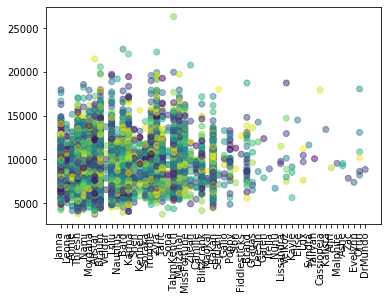

In [50]:
x = data['blueSupportChamp']
y = data['goldblueSupport']

plt.xticks(rotation = 'vertical')
c = np.random.rand(7620)
plt.scatter(x,y,alpha=0.5 , c = c)
plt.show()

# Normilized

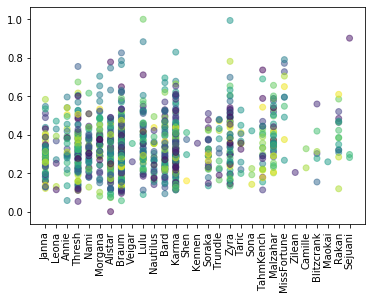

In [51]:
## Normilization 
x = data['blueSupportChamp'].head(1000)
y = data['goldblueSupport'].head(1000)

max_ = y.max()
min_ = y.min()
y= y.map(lambda x : (x - min_ ) / (max_ - min_))

plt.xticks(rotation = 'vertical')
c = np.random.rand(1000)
plt.scatter(x,y,alpha=0.5 , c = c)
plt.show()

# Correlation

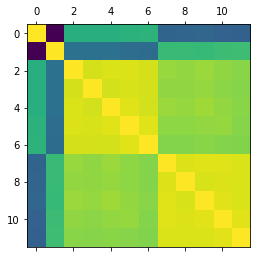

In [52]:
plt.matshow(corr)
plt.show()

In [53]:
corr.style.background_gradient(cmap='coolwarm')

,bResult,rResult,goldblueMiddle,goldblueTop,goldblueADC,goldblueSupport,goldblueJungle,goldredMiddle,goldredTop,goldredADC,goldredSupport,goldredJungle
bResult,1,-1,0.257164,0.257101,0.253766,0.285206,0.296721,-0.353338,-0.343984,-0.341734,-0.369981,-0.380071
rResult,-1,1,-0.257164,-0.257101,-0.253766,-0.285206,-0.296721,0.353338,0.343984,0.341734,0.369981,0.380071
goldblueMiddle,0.257164,-0.257164,1,0.873715,0.887332,0.891636,0.871298,0.690411,0.677251,0.699901,0.665704,0.641757
goldblueTop,0.257101,-0.257101,0.873715,1,0.861508,0.87898,0.871611,0.66663,0.66488,0.683937,0.65537,0.634146
goldblueADC,0.253766,-0.253766,0.887332,0.861508,1,0.903833,0.863073,0.696473,0.685321,0.715989,0.674974,0.647127
goldblueSupport,0.285206,-0.285206,0.891636,0.87898,0.903833,1,0.899458,0.661229,0.660965,0.675165,0.683167,0.633952
goldblueJungle,0.296721,-0.296721,0.871298,0.871611,0.863073,0.899458,1,0.632143,0.631422,0.642481,0.626915,0.623224
goldredMiddle,-0.353338,0.353338,0.690411,0.66663,0.696473,0.661229,0.632143,1,0.890649,0.9024,0.903235,0.888748
goldredTop,-0.343984,0.343984,0.677251,0.66488,0.685321,0.660965,0.631422,0.890649,1,0.878588,0.894126,0.888902
goldredADC,-0.341734,0.341734,0.699901,0.683937,0.715989,0.675165,0.642481,0.9024,0.878588,1,0.913238,0.882932


In [54]:
c = 0 
for ones in data['bResult']:
    if(ones == 1):
        c+=1
print('blue wins ' + str(c) ) 

for ones in data['rResult']:
    if(ones == 1):
        c+=1
print('red wins ' + str(c) )

blue wins 4146
red wins 7620


# Differance between the golds

In [55]:
gold_blue = ['goldblueMiddle','goldblueTop','goldblueSupport','goldblueADC','goldblueJungle']
gold_red =  ['goldredMiddle','goldredTop','goldredSupport','goldredADC','goldredJungle']
pos  = ['goldMiddle' , 'goldTop', 'goldSupport' , 'goldADC' , 'goldJungle']

for i in range(0,len(gold_blue)):
#     diff = data[gold_blue[i]]
    data[pos[i]+'_diff'] = data[gold_blue[i]] - data[gold_red[i]]


In [56]:
data= data.drop(gold_list , axis =1)

In [57]:
data.head()

,Address,bResult,rResult,blueTopChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueJungleChamp,redTopChamp,redMiddleChamp,redADCChamp,redSupportChamp,redJungleChamp,goldMiddle_diff,goldTop_diff,goldSupport_diff,goldADC_diff,goldJungle_diff
0,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Irelia,Ahri,Jinx,Janna,RekSai,Gnar,Fizz,Sivir,Thresh,Elise,4281,574,1379,-208,31
1,http://matchhistory.na.leagueoflegends.com/en/...,0,1,Gnar,Ahri,Caitlyn,Leona,Rengar,Irelia,Azir,Corki,Annie,JarvanIV,-95,486,-228,-680,1682
2,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Renekton,Fizz,Sivir,Annie,Rengar,Sion,Azir,Corki,Janna,LeeSin,2758,2652,3186,4882,437
3,http://matchhistory.na.leagueoflegends.com/en/...,0,1,Irelia,Leblanc,Sivir,Thresh,JarvanIV,Gnar,Lulu,KogMaw,Janna,Nunu,-1305,856,-2093,-1166,-799
4,http://matchhistory.na.leagueoflegends.com/en/...,1,0,Gnar,Lissandra,Tristana,Janna,JarvanIV,Sion,Lulu,Corki,Annie,RekSai,3362,-236,2798,4087,1311


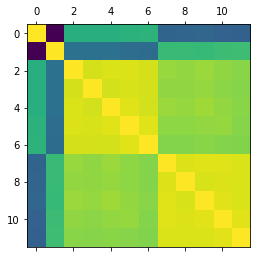

In [58]:
plt.matshow(corr)
plt.show()

In [59]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,bResult,rResult,goldMiddle_diff,goldTop_diff,goldSupport_diff,goldADC_diff,goldJungle_diff
bResult,1,-1,0.777613,0.735608,0.82436,0.791522,0.780942
rResult,-1,1,-0.777613,-0.735608,-0.82436,-0.791522,-0.780942
goldMiddle_diff,0.777613,-0.777613,1,0.654801,0.748627,0.665982,0.713542
goldTop_diff,0.735608,-0.735608,0.654801,1,0.702439,0.603184,0.69791
goldSupport_diff,0.82436,-0.82436,0.748627,0.702439,1,0.779574,0.794456
goldADC_diff,0.791522,-0.791522,0.665982,0.603184,0.779574,1,0.699618
goldJungle_diff,0.780942,-0.780942,0.713542,0.69791,0.794456,0.699618,1


# Training the data

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
cham_drop_list = ['blueTopChamp','blueMiddleChamp','blueADCChamp','blueSupportChamp','blueJungleChamp',
                  'redTopChamp','redMiddleChamp','redADCChamp','redJungleChamp','redSupportChamp']
new_data = data.drop('Address' , axis = 1)
new_data = new_data.drop(cham_drop_list , axis = 1)
new_data = pd.get_dummies(new_data)


In [102]:
new_data.head()

,bResult,rResult,goldMiddle_diff,goldTop_diff,goldSupport_diff,goldADC_diff,goldJungle_diff
0,1,0,4281,574,1379,-208,31
1,0,1,-95,486,-228,-680,1682
2,1,0,2758,2652,3186,4882,437
3,0,1,-1305,856,-2093,-1166,-799
4,1,0,3362,-236,2798,4087,1311


In [103]:
from sklearn.model_selection import train_test_split as ttp

In [104]:
drop_list = ['goldTop_diff','goldMiddle_diff', 'goldADC_diff' , 'goldJungle_diff']
y = new_data['bResult']
X = new_data.drop(['rResult','bResult','goldMiddle_diff', 'goldADC_diff' , 'goldJungle_diff' ] , axis = 1)

In [105]:
X.head()

,goldTop_diff,goldSupport_diff
0,574,1379
1,486,-228
2,2652,3186
3,856,-2093
4,-236,2798


# LogisticRegression

In [106]:
X_train, X_test , y_train, y_test =ttp(X, y, test_size= 0.25) 

In [107]:
from sklearn.linear_model import LogisticRegression as LR

In [108]:
lr_clf = LR()

In [109]:
lr_clf.fit(X_train, y_train)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
lr_clf.score(X_train, y_train)

0.9424321959755031

In [120]:
lr_clf.predict([[-12, 1]])

array([0], dtype=int64)

In [99]:
lr_clf.fit(X_test, y_test)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
lr_clf.score(X_test, y_test)

0.8671916010498688

# KNeighborsClassifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier as KN

In [126]:
kn_c = KN(n_neighbors=5)
kn_c.fit(X_train , y_train)
kn_c.score(X_train , y_train)

0.947681539807524

In [127]:
kn_c.fit(X_test , y_test)
kn_c.score(X_test , y_test)

0.94750656167979

# Grid Search

In [128]:
from sklearn.model_selection import GridSearchCV as GS

In [129]:
param_dic = {'leaf_size' : [5 , 15 , 20 , 30 ], 'n_neighbors': [10,25,50,100]}

In [130]:
knn_clf = KN()

In [131]:
grid_s = GS(knn_clf , param_dic , cv = 2)

In [132]:
grid_s.fit(X_train , y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [5, 15, 20, 30],
                         'n_neighbors': [10, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
grid_s.score(X_train , y_train)

0.9434820647419072

In [134]:
grid_s.fit(X_test , y_test)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [5, 15, 20, 30],
                         'n_neighbors': [10, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
grid_s.score(X_test , y_test)

0.9496062992125984

# SVC 

In [136]:
from sklearn.svm import SVC

In [137]:
svm_clf = SVC()

In [138]:
svm_clf.fit(X_train , y_train )

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [139]:
svm_clf.score(X_train , y_train)

1.0

In [154]:
svm_clf.predict([[-424355,-13254]])

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

In [155]:
svm_clf.fit(X_test , y_test )

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [141]:
svm_clf.score(X_test , y_test)

1.0

# Training the data with Champions as the features

In [142]:
cham_drop_list = cham_drop_list = ['blueTopChamp','blueMiddleChamp' ,'blueSupportChamp','blueJungleChamp',
                                   'redTopChamp','redMiddleChamp','redADCChamp','redJungleChamp','redSupportChamp']
new_data = data.drop('Address' , axis = 1)
new_data = new_data.drop(cham_drop_list , axis = 1)
new_data = pd.get_dummies(new_data)


In [143]:
drop_list = ['goldTop_diff','goldMiddle_diff', 'goldADC_diff' , 'goldJungle_diff' , 'goldSupport_diff']

new_data =  new_data.drop(drop_list , axis = 1 )
y = new_data['bResult']
X = new_data.drop(['rResult','bResult' ] , axis = 1)

In [144]:
X.head()

,blueADCChamp_Alistar,blueADCChamp_Ashe,blueADCChamp_Blitzcrank,blueADCChamp_Caitlyn,blueADCChamp_Corki,blueADCChamp_Draven,blueADCChamp_Ezreal,blueADCChamp_Graves,blueADCChamp_Heimerdinger,blueADCChamp_Irelia,...,blueADCChamp_Quinn,blueADCChamp_Sivir,blueADCChamp_Tristana,blueADCChamp_Twitch,blueADCChamp_Urgot,blueADCChamp_Varus,blueADCChamp_Vayne,blueADCChamp_Viktor,blueADCChamp_Xayah,blueADCChamp_Ziggs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [145]:
X_train, X_test , y_train, y_test =ttp(X, y, test_size= 0.25) 

In [54]:
X_train.head()

,blueADCChamp_Alistar,blueADCChamp_Ashe,blueADCChamp_Blitzcrank,blueADCChamp_Caitlyn,blueADCChamp_Corki,blueADCChamp_Draven,blueADCChamp_Ezreal,blueADCChamp_Graves,blueADCChamp_Heimerdinger,blueADCChamp_Irelia,...,blueADCChamp_Quinn,blueADCChamp_Sivir,blueADCChamp_Tristana,blueADCChamp_Twitch,blueADCChamp_Urgot,blueADCChamp_Varus,blueADCChamp_Vayne,blueADCChamp_Viktor,blueADCChamp_Xayah,blueADCChamp_Ziggs
3566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4746,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logical regression.

In [55]:
lr_clf = LR()

In [56]:
lr_clf.fit(X_train, y_train)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr_clf.score(X_train, y_train)

0.5454068241469816

In [58]:
lr_clf.fit(X_test,y_test)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
lr_clf.score(X_test,y_test)

0.5559055118110237

In [60]:
kn_c = KN(n_neighbors=5)
kn_c.fit(X_train , y_train)
kn_c.score(X_train , y_train)

0.5396325459317586

In [61]:
kn_c = KN(n_neighbors=5)
kn_c.fit(X_test , y_test)
kn_c.score(X_test , y_test)

0.5091863517060368

In [62]:
svm_clf = SVC()

In [63]:
svm_clf.fit(X_train,y_train)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [64]:
svm_clf.score(X_train, y_train)

0.5426071741032371

In [65]:
svm_clf.fit(X_test , y_test)

c:\users\parsa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
svm_clf.score(X_test , y_test)

0.5485564304461942